In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('/tmp/data/',one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
print(mnist.train.num_examples)

55000


In [4]:
print(mnist.test.num_examples)

10000


In [5]:
training=mnist.train.images
trainlabel=mnist.train.labels
testing=mnist.test.images
testing=mnist.test.labels

In [7]:
training.shape

(55000, 784)

23891th Training Data lable is8


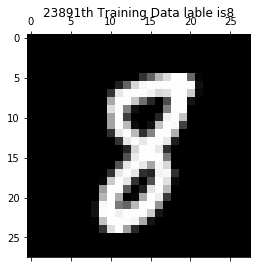

50988th Training Data lable is1


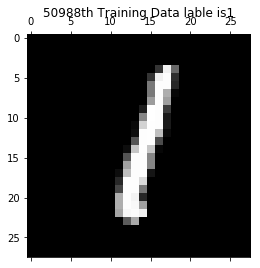

16576th Training Data lable is0


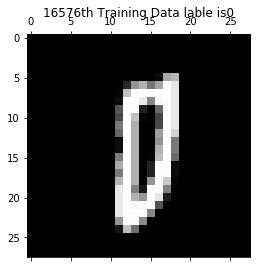

10281th Training Data lable is3


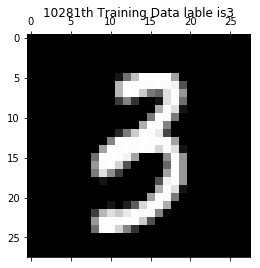

54860th Training Data lable is3


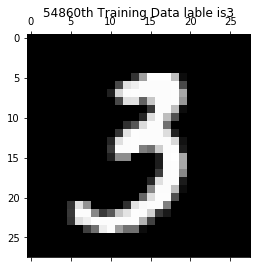

In [8]:
nsample=5
randidx=np.random.randint(training.shape[0],size=nsample)
for i in randidx:
    curr_img=np.reshape(training[i,:],(28,28))
    curr_label=np.argmax(trainlabel[i,:])
    plt.matshow(curr_img,cmap=plt.get_cmap('gray'))
    plt.title(""+str(i)+"th Training Data "+"lable is"+str(curr_label))
    print(""+str(i)+"th Training Data "+"lable is"+str(curr_label))
    plt.show()

In [9]:
batch_size=100
batch_xs,batch_ys=mnist.train.next_batch(batch_size)
batch_xs.shape
batch_ys.shape

(100, 10)

In [31]:
x=tf.placeholder(tf.float32,shape=[None,784],name='X_input')
y=tf.placeholder(tf.float32,shape=[None,10],name='y_input')
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))
actv=tf.matmul(x,W)+tf.cast(b, tf.float32)
entropy=tf.nn.softmax_cross_entropy_with_logits(logits=actv,labels=y)
loss=tf.reduce_mean(entropy)
#cost=tf.reduce_mean(-tf.reduce_sum(y*tf.log(actv),reduction_indices=1))
learning_rate=0.01
optm=tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [37]:
pred=tf.equal(tf.argmax(actv,1),tf.argmax(y,1))
accr=tf.reduce_mean(tf.cast(pred,tf.float32))
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    num=int(mnist.train.num_examples/batch_size)
    for epoch in range(50):
        for i in range(num):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            _,losses=sess.run([optm,loss],feed_dict={x:batch_xs,y:batch_ys})
            
        if(epoch%5==0):
            test_data={x:mnist.test.images,y:mnist.test.labels}
            train_data={x:batch_xs,y:batch_ys}
            train_acc=sess.run(accr,train_data)
            test_acc=sess.run(accr,test_data)
            print("Eopchs=",epoch,"train_acc=",train_acc,"test_acc=",test_acc)
        

Eopchs= 0 train_acc= 0.9 test_acc= 0.9189
Eopchs= 5 train_acc= 0.96 test_acc= 0.9144
Eopchs= 10 train_acc= 0.9 test_acc= 0.9222
Eopchs= 15 train_acc= 0.98 test_acc= 0.919
Eopchs= 20 train_acc= 0.94 test_acc= 0.9104
Eopchs= 25 train_acc= 0.92 test_acc= 0.9159
Eopchs= 30 train_acc= 0.93 test_acc= 0.9176
Eopchs= 35 train_acc= 0.93 test_acc= 0.9168
Eopchs= 40 train_acc= 0.92 test_acc= 0.916
Eopchs= 45 train_acc= 0.95 test_acc= 0.9201
